# Adult Income Dataset

---

### Valencia Melita Christy - 0706022210007

- Age: Describes the age of individuals. Continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- fnlwgt: Continuous.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- education-num: Number of years spent in education. Continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.

- capital-gain: Continuous.

- capital-loss: Continuous.

- hours-per-week: Continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- salary: >50K,<=50K

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/valenciamelita/Dataset-DM/refs/heads/main/adult.csv')
pd.set_option('display.max_columns', None)
df.sample(10) # Mencetak 10 random sample

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9945,41,Local-gov,359259,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
1035,50,Local-gov,177705,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1740,48,United-States,<=50K
2959,45,Local-gov,326064,Some-college,10,Divorced,Adm-clerical,Unmarried,Black,Female,6497,0,35,United-States,<=50K
10746,66,Self-emp-not-inc,291362,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
32062,22,Federal-gov,57216,Some-college,10,Never-married,Adm-clerical,Own-child,Black,Male,0,0,20,United-States,<=50K
27302,45,Private,101320,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
15960,42,Federal-gov,65950,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
14482,36,Private,279615,Bachelors,13,Divorced,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
31380,23,Private,129345,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,25,United-States,<=50K
17290,44,Private,106900,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,44,United-States,>50K


In [3]:
df.head() # Mencetak 5 baris pertama

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## EDA

In [4]:
df.info() # Menampilkan informasi mengenai DataFrame

# DataFrame ini memiliki total 32.561 entri (baris) dan 15 kolom
# Indeks berkisar dari 0 hingga 32.560

# Data kolom:
# - age: Umur individu (tipe data int64)
# - workclass: Kategori pekerjaan individu (tipe data object)
# - fnlwgt: Bobot akhir individu (tipe data int64), yang merupakan estimasi populasi berdasarkan survei
# - education: Tingkat pendidikan individu (tipe data object)
# - education.num: Representasi numerik dari tingkat pendidikan (tipe data int64)
# - marital.status: Status perkawinan individu (tipe data object)
# - occupation: Jenis pekerjaan individu (tipe data object)
# - relationship: Hubungan individu dalam keluarga (tipe data object)
# - race: Ras individu (tipe data object)
# - sex: Jenis kelamin individu (tipe data object)
# - capital.gain: Keuntungan modal individu (tipe data int64)
# - capital.loss: Kerugian modal individu (tipe data int64)
# - hours.per.week: Jumlah jam kerja per minggu (tipe data int64)
# - native.country: Negara asal individu (tipe data object)
# - income: Pendapatan individu (tipe data object), dengan kategori <=50K atau >50K

# Semua kolom memiliki nilai non-null, yang menunjukkan tidak ada nilai hilang (missing values).
# Terdapat 6 kolom dengan tipe data integer (int64) dan 9 kolom dengan tipe data objek (object).
# Penggunaan memori DataFrame ini adalah lebih dari 3.7 MB.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()
# melihat statistik deskriptif dari dataset

# Menampilkan deskripsi statistik untuk beberapa kolom numerik dari DataFrame
# Kolom yang dianalisis adalah: age, fnlwgt, education.num, capital.gain, capital.loss, dan hours.per.week

# count: Jumlah nilai yang valid (non-null) untuk setiap kolom.
# Semua kolom memiliki 32.561 nilai, menunjukkan tidak ada nilai yang hilang.

# mean: Rata-rata nilai untuk setiap kolom.
# - age: Rata-rata umur individu adalah sekitar 38.58 tahun.
# - fnlwgt: Rata-rata bobot akhir adalah sekitar 189.778.
# - education.num: Rata-rata tingkat pendidikan (dalam angka) adalah sekitar 10.08.
# - capital.gain: Rata-rata keuntungan modal adalah sekitar 1.078.
# - capital.loss: Rata-rata kerugian modal adalah sekitar 87.30.
# - hours.per.week: Rata-rata jam kerja per minggu adalah sekitar 40.44 jam.

# std: Standar deviasi dari nilai untuk setiap kolom, yang menunjukkan seberapa tersebar nilai-nilai tersebut.
# - age: Standar deviasi sekitar 13.64 menunjukkan variabilitas umur individu.
# - fnlwgt: Standar deviasi sekitar 105.550 menunjukkan variasi bobot akhir yang signifikan.
# - education.num: Standar deviasi sekitar 2.57 menunjukkan variabilitas dalam tingkat pendidikan.
# - capital.gain: Standar deviasi yang tinggi (7385.29) menunjukkan ada nilai keuntungan yang sangat besar.
# - capital.loss: Standar deviasi (402.96) menunjukkan variabilitas dalam kerugian modal.
# - hours.per.week: Standar deviasi sekitar 12.35 menunjukkan variasi dalam jam kerja per minggu.

# min: Nilai minimum untuk setiap kolom.
# - age: Usia termuda adalah 17 tahun.
# - fnlwgt: Bobot akhir terkecil adalah 12.285.
# - education.num: Tingkat pendidikan terendah (dalam angka) adalah 1.
# - capital.gain: Keuntungan modal minimum adalah 0.
# - capital.loss: Kerugian modal minimum adalah 0.
# - hours.per.week: Jam kerja minimum adalah 1 jam.

# 25%: Kuartil pertama (Q1), nilai di bawah 25% dari data.
# - age: 25% individu berusia di bawah 28 tahun.
# - fnlwgt: 25% memiliki bobot akhir di bawah 117.827.
# - education.num: 25% memiliki tingkat pendidikan di bawah 9.
# - capital.gain: 25% tidak mengalami keuntungan modal (0).
# - capital.loss: 25% tidak mengalami kerugian modal (0).
# - hours.per.week: 25% individu bekerja kurang dari 40 jam per minggu.

# 50%: Median (Q2), nilai di tengah dataset.
# - age: Setengah dari individu berusia di bawah 37 tahun.
# - fnlwgt: Median bobot akhir sekitar 178.356.
# - education.num: Median tingkat pendidikan adalah 10.
# - capital.gain: 50% tidak mengalami keuntungan modal (0).
# - capital.loss: 50% tidak mengalami kerugian modal (0).
# - hours.per.week: Median jam kerja adalah 40 jam.

# 75%: Kuartil ketiga (Q3), nilai di bawah 75% dari data.
# - age: 75% individu berusia di bawah 48 tahun.
# - fnlwgt: 75% memiliki bobot akhir di bawah 237.051.
# - education.num: 75% memiliki tingkat pendidikan di bawah 12.
# - capital.gain: 75% tidak mengalami keuntungan modal (0).
# - capital.loss: 75% tidak mengalami kerugian modal (0).
# - hours.per.week: 75% individu bekerja kurang dari 45 jam per minggu.

# max: Nilai maksimum untuk setiap kolom.
# - age: Usia tertua adalah 90 tahun.
# - fnlwgt: Bobot akhir terbesar adalah 1.484.705.
# - education.num: Tingkat pendidikan tertinggi (dalam angka) adalah 16.
# - capital.gain: Keuntungan modal maksimum adalah 99.999.
# - capital.loss: Kerugian modal maksimum adalah 4.356.
# - hours.per.week: Jam kerja maksimum adalah 99 jam.


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.shape # Melihat ukuran dataset. Ada 32.561 baris dan 15 kolom

(32561, 15)

In [7]:
print(df['workclass'].value_counts())
print()
print(df['education'].value_counts())
print()
print(df['marital.status'].value_counts())
print()
print(df['occupation'].value_counts())
print()
print(df['relationship'].value_counts())
print()
print(df['race'].value_counts())
print()
print(df['sex'].value_counts())
print()
print(df['native.country'].value_counts())
print()
print(df['income'].value_counts())

# Untuk menghitung frekuensi atau jumlah kemunculan value unik setiap kolom kategorikal
# workclass, education, marital.status, occupation, relationship, race, sex, native.country, income


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial   

In [8]:
# Mengganti '?' dengan NaN di semua kolom
df.replace('?', np.nan, inplace=True)

# Menghapus value NaN
df.dropna(inplace=True)

In [9]:
df.isnull().sum() # Memeriksa adanya null atau tidak. Tidak ada null dalam dataset

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


<ipython-input-10-22c943678cb1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index, y=income_counts.values, palette='viridis')


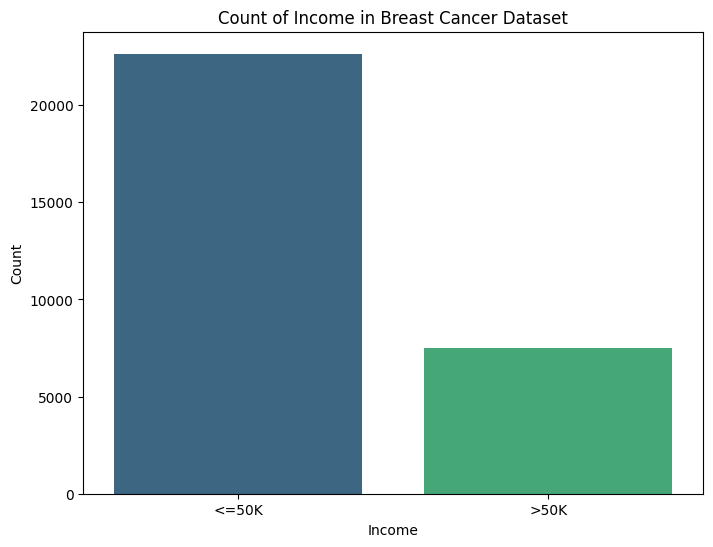

In [10]:
income_counts = df['income'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values, palette='viridis')

# Add titles and labels
plt.title('Count of Income in Breast Cancer Dataset')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# distribusi dataset kurang seimbang antara income yang lebih dari 50rb dan yang kurang.

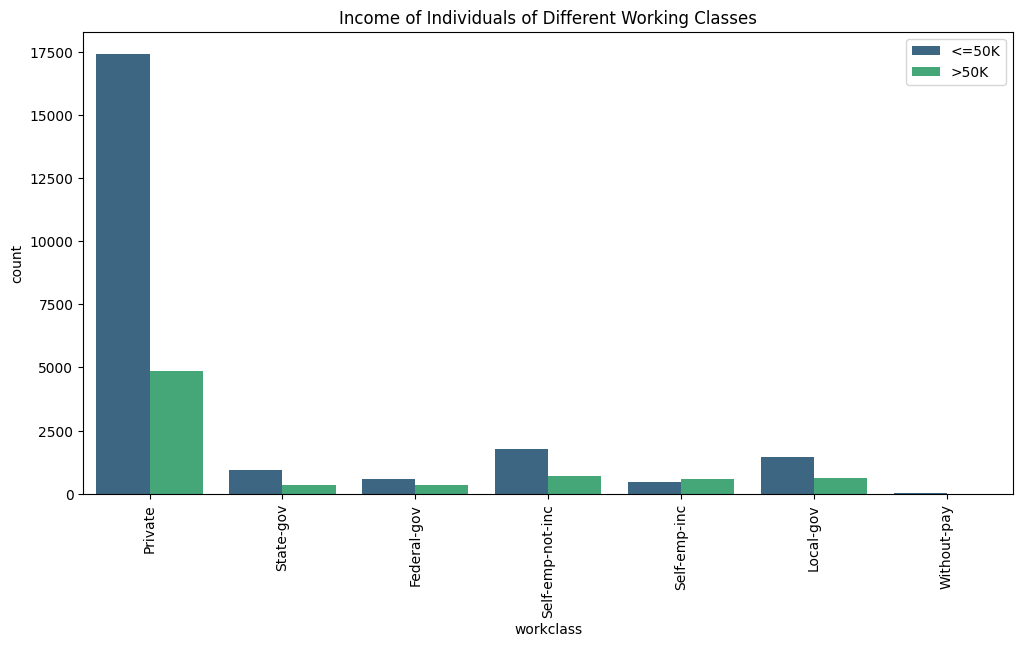

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=df, palette='viridis')
plt.title('Income of Individuals of Different Working Classes')
plt.xticks(rotation=90)
plt.yticks()
plt.legend()
plt.show()

Data menunjukkan bahwa hanya kategori Self-Employed yang memiliki lebih banyak individu dengan penghasilan di atas 50 ribu dolar daripada di bawahnya, mengindikasikan bahwa pekerjaan mandiri atau bisnis pribadi yang sukses cenderung menghasilkan pendapatan lebih tinggi. Sebaliknya, sektor swasta memiliki ketimpangan yang signifikan, dengan lebih dari 75% pekerjanya berpenghasilan kurang dari 50 ribu dolar per tahun. Untuk pekerja pemerintah federal, terdapat sedikit perbedaan antara jumlah yang berpenghasilan di atas dan di bawah 50 ribu dolar, menunjukkan kesenjangan yang lebih kecil. Kategori Without-Pay dan Never-Worked memiliki data yang sangat terbatas di kedua kelompok pendapatan.

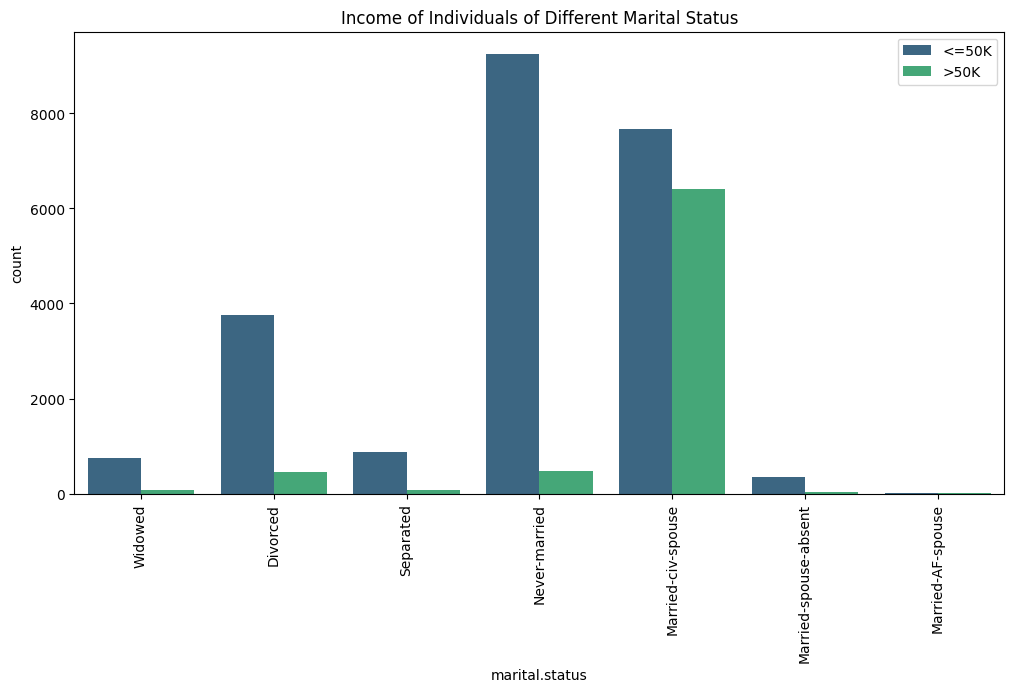

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='marital.status', hue='income', data=df, palette='viridis')
plt.title('Income of Individuals of Different Marital Status')
plt.xticks(rotation = 90)
plt.yticks()
plt.legend()

kategori *Married-civ-spouse* adalah satu-satunya yang memiliki jumlah individu yang hampir seimbang antara yang berpenghasilan di atas dan di bawah 50 ribu dolar per tahun. Sementara itu, pada kategori lainnya, kurang dari 25% orang dewasa berpenghasilan lebih dari 50 ribu dolar per tahun.

<ipython-input-13-c2645ea4fd08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=df, palette="viridis")


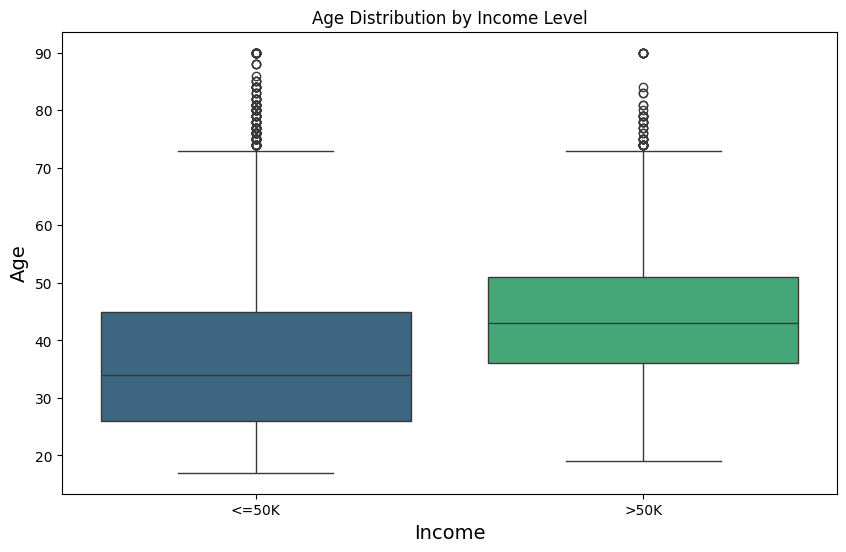

In [13]:
plt.figure(figsize=(10, 6))

# Create the boxplot for age versus income
sns.boxplot(x='income', y='age', data=df, palette="viridis")

# Add title and labels
plt.title("Age Distribution by Income Level")
plt.xlabel("Income", fontsize=14)
plt.ylabel("Age", fontsize=14)

# Display the plot
plt.show()

# Distribusi umur memperlihatkan bahwa income lebih daripada 50 ribu kebanyakan diperoleh oleh umur yang lebih tua, diantara usia 30 hingga 50.

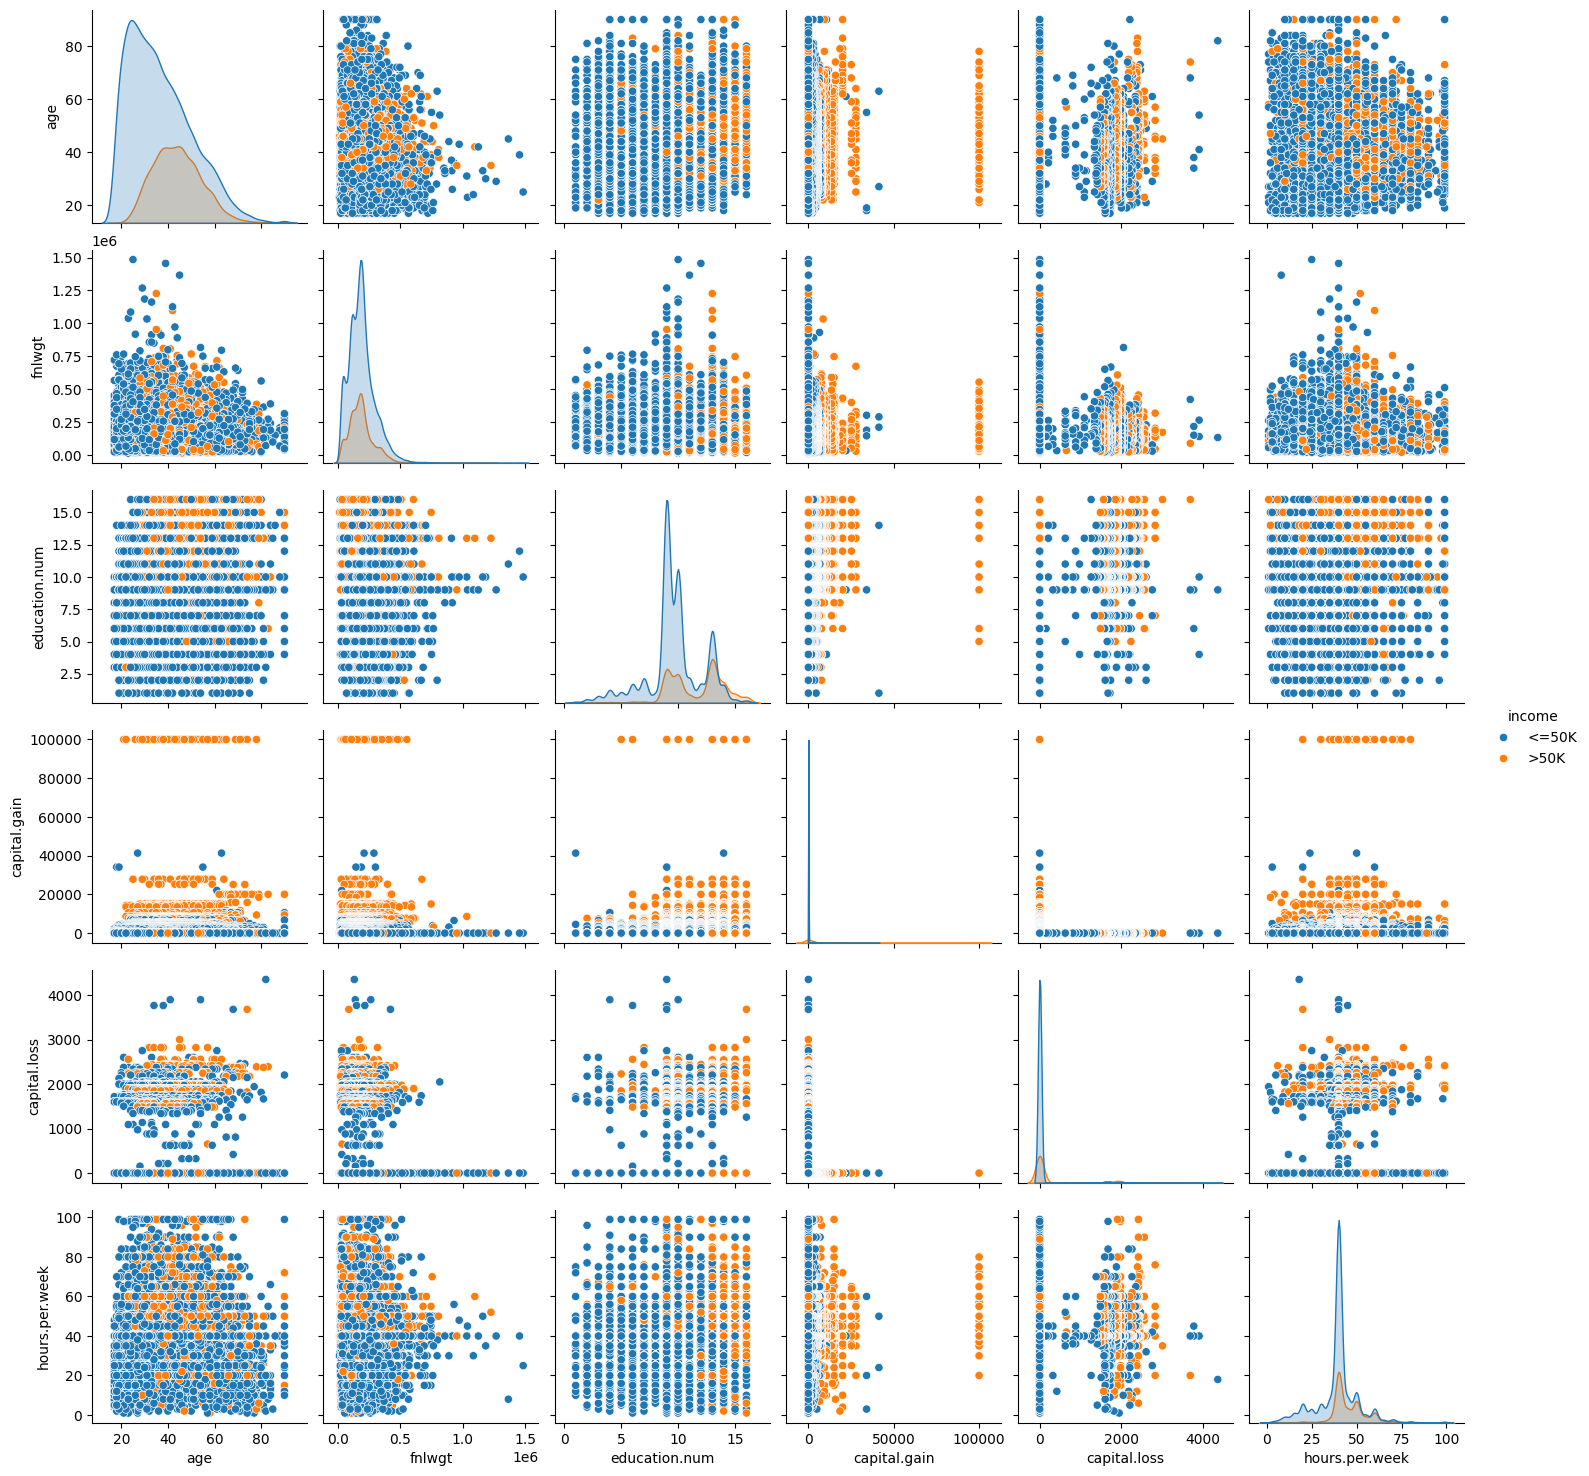

In [15]:
sns.pairplot(df, hue='income', diag_kind='kde')
plt.show()

# Kode ini menghasilkan pairplot untuk dataset dengan menggunakan Seaborn. Pairplot ini menyajikan matriks scatter plot untuk setiap kombinasi variabel dalam dataset,
# di mana warna titik ditentukan oleh kolom outcome. Hal ini memungkinkan visualisasi hubungan antar variabel serta distribusi data berdasarkan hasil yang diperoleh.

Secara umum, tingkat pendidikan dan capital gain memiliki korelasi positif yang kuat dengan pendapatan, menunjukkan bahwa semakin tinggi tingkat pendidikan dan semakin besar capital gain yang dimiliki seseorang, semakin besar kemungkinan mereka memiliki pendapatan yang tinggi. Namun, tidak ditemukan korelasi yang kuat antara usia dan jumlah jam kerja dengan pendapatan. Variabel-variabel lain seperti jenis pekerjaan, status pernikahan, dan ras juga perlu dipertimbangkan untuk mendapatkan pemahaman yang lebih komprehensif tentang faktor-faktor yang mempengaruhi pendapatan. Analisis lebih lanjut seperti regresi linier berganda dapat membantu mengidentifikasi model yang lebih akurat untuk memprediksi pendapatan berdasarkan berbagai variabel.

In [16]:
from sklearn.preprocessing import LabelEncoder

# Misalnya, kita sudah memiliki DataFrame df
# Buat instance dari LabelEncoder
le = LabelEncoder()

# Daftar kolom yang akan di-mapping
columns_to_encode = [
    'workclass', 'education', 'marital.status',
    'occupation', 'relationship', 'race',
    'sex', 'native.country', 'income'
]

# Lakukan encoding menggunakan LabelEncoder untuk tiap kolom dalam daftar
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column].astype(str))  # Mengubah ke string untuk memastikan tidak ada error



In [17]:
# Lihat hasil mapping pada beberapa baris pertama
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0


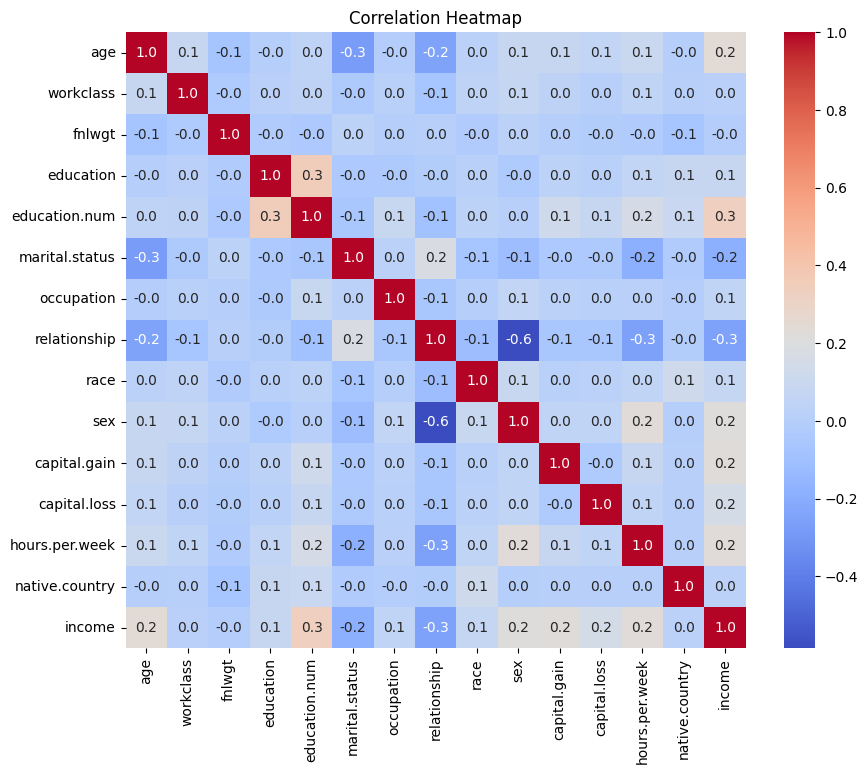

In [18]:
# Menunjukkan korelasi antar variabel dengan angka. Angka yang mendekati 1 atau -1 menunjukkan korelasi yang kuat.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

Matriks korelasi menunjukkan bahwa terdapat hubungan positif moderat antara umur dan pendapatan (0.24), serta antara tingkat pendidikan (education.num) dan pendapatan (0.34), yang mengindikasikan bahwa individu yang lebih tua dan berpendidikan lebih tinggi cenderung memiliki pendapatan yang lebih baik. Selain itu, status pernikahan menunjukkan korelasi negatif (-0.19) dengan pendapatan, mungkin menunjukkan bahwa individu yang menikah lebih mungkin untuk memiliki pendapatan tinggi. Hubungan antara jam kerja per minggu dan pendapatan juga positif (0.23), menunjukkan bahwa lebih banyak jam kerja berhubungan dengan pendapatan yang lebih tinggi. Terdapat juga korelasi positif moderat antara keuntungan modal (capital.gain) dan pendapatan (0.22). Variabel seperti jenis pekerjaan dan negara asal menunjukkan korelasi yang lemah, menandakan bahwa dampak dari faktor-faktor ini mungkin lebih kompleks dan memerlukan analisis lebih mendalam.

## Machine Learning

In [19]:
#1 Memecah variabel independen dan variabel target, X untuk kolom dengan variabel independen sedangkan Y untuk kolom variabel target
X = df.drop('income', axis=1)
y = df['income']

In [20]:
#2 Memecah data untuk testing dan juga training. Untuk testing sebanyak 20% dan untuk training sebanyak 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#3 Memperlihatkan jumlah baris dan kolom yang ada dalam test dan train
# 24129 baris dalam train, 6033 baris dalam test
X_train.shape, X_test.shape

((24129, 14), (6033, 14))

### Decision Tree Gini

In [22]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=4)
dt_gini.fit(X_train, y_train)
# Membuat model decision tree dengan kriteria yang didasarkan pada gini untuk menghitung impurity, random state digunakan untuk hasil nilai acak yang sama setiap mengambil data
# Melatih model decision tree menggunakan x-train dan y-train

DecisionTreeClassifier(max_depth=4, random_state=42)

In [23]:
y_pred_gini = dt_gini.predict(X_test)
# Variabel y_pred_gini akan berisi hasil prediksi dari data uji X_test, yang dapat digunakan untuk membandingkan hasil prediksi dengan label asli (y_test) dan menilai kinerja model.

In [24]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini:", accuracy_gini)
# Mengukur seberapa akurat sebuah model.

Model accuracy score with criterion gini: 0.8385546162771423


In [25]:
train_score = dt_gini.score(X_train, y_train) # Menghitung akurasi pada data train. Nilai ini menunjukkan seberapa baik model dapat memprediksi label dari data yang sama digunakan saat pelatihan.
test_score = dt_gini.score(X_test, y_test) # Menghitung akurasi model pada data uji. Ini memberikan gambaran tentang seberapa baik model dapat memprediksi label dari data yang tidak terlihat sebelumnya.
print("Training set score:", train_score)
print("Test set score:", test_score)

Training set score: 0.8418500559492726
Test set score: 0.8385546162771423


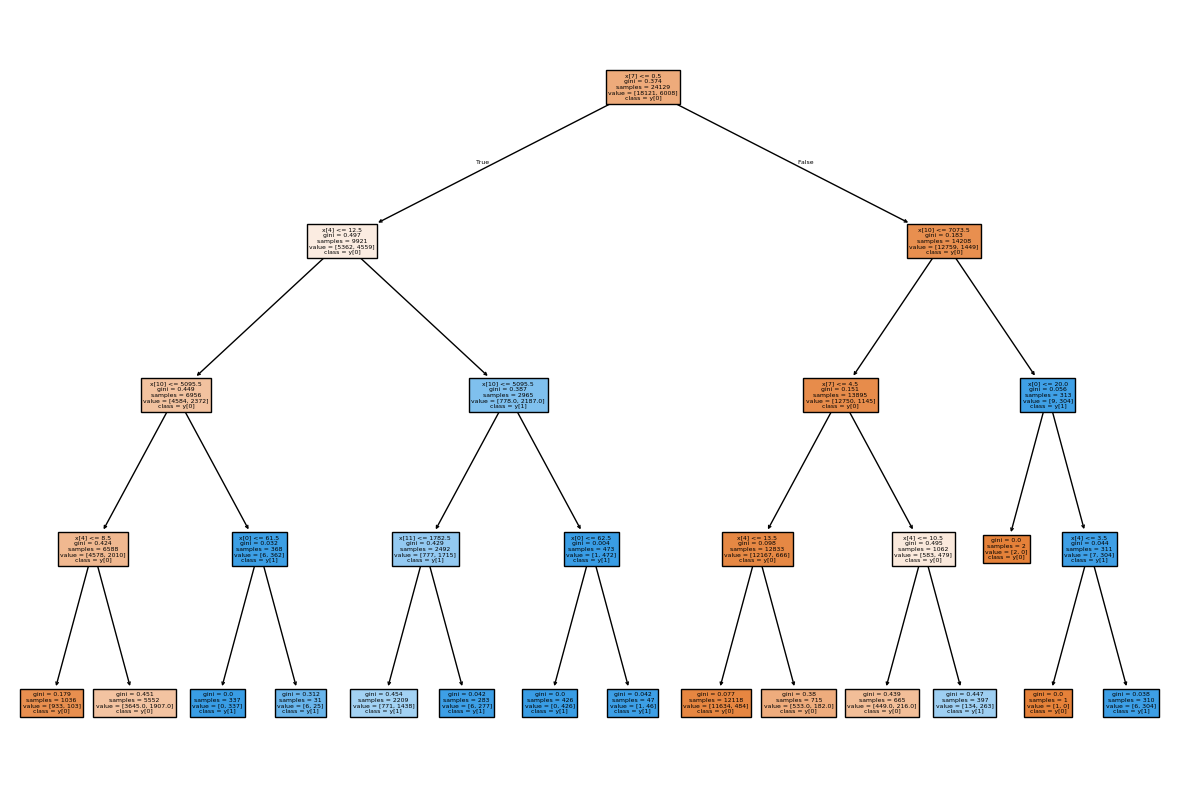

In [26]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_gini, filled=True, class_names=True)
plt.show()

Decision tree ini dimulai dengan node root yang membagi data berdasarkan fitur x[1] ≤ 13.37. Setiap node dalam tree ini menampilkan beberapa informasi penting: gini index yang mengukur impurity atau ketidakmurnian node, jumlah sampel (samples) yang ada pada node tersebut, distribusi nilai (value) yang menunjukkan jumlah sampel dari setiap kelas di dalam node, dan kelas prediksi (class) yang ditentukan oleh mayoritas sampel dalam node tersebut. Sebagai contoh, jika sebuah node memiliki distribusi value [100, 20], ini berarti terdapat 100 sampel dari kelas 0 (pendapatan ≤ 50K) dan 20 sampel dari kelas 1 (pendapatan > 50K).

Warna pada node menunjukkan kelas mayoritas dari sampel yang ada pada node tersebut, dengan warna oranye menunjukkan kelas 0 (pendapatan ≤ 50K) dan warna biru menunjukkan kelas 1 (pendapatan > 50K). Decision tree ini memberikan visualisasi yang jelas tentang bagaimana setiap fitur memengaruhi pembagian data dan keputusan yang dibuat oleh model.



In [27]:
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("\nConfusion matrix with criterion gini:")
print(cm_gini)


Confusion matrix with criterion gini:
[[4280  253]
 [ 721  779]]


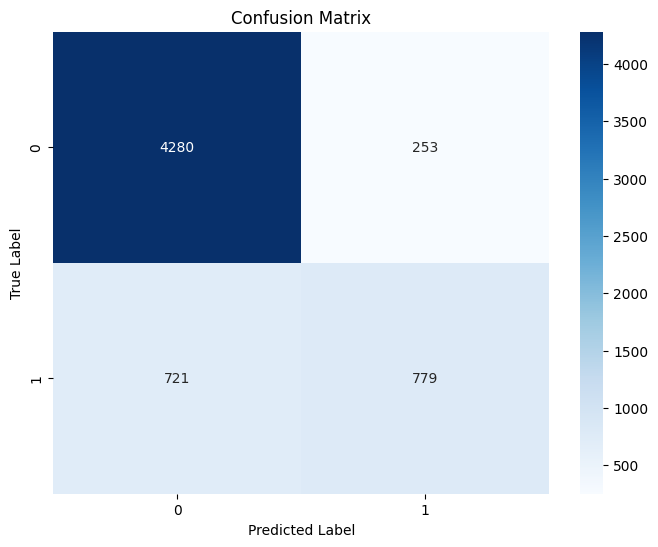

In [41]:
# Plotting the Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gini, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

True Negatives (TN): 4280 (benar, di bawah 50K)

False Positives (FP): 253 (salah, di bawah 50K tetapi diprediksi di atas)

False Negatives (FN): 721 (salah, di atas 50K tetapi diprediksi di bawah)

True Positives (TP): 779 (benar, di atas 50K)



In [29]:
cr_gini = classification_report(y_test, y_pred_gini)
print("\nClassification report with criterion gini:\n", cr_gini)


Classification report with criterion gini:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4533
           1       0.75      0.52      0.62      1500

    accuracy                           0.84      6033
   macro avg       0.81      0.73      0.76      6033
weighted avg       0.83      0.84      0.83      6033



Laporan klasifikasi menggunakan kriteria gini menunjukkan bahwa model memiliki kinerja yang baik secara keseluruhan, dengan akurasi sebesar 84% dari total 6033 sampel. Untuk kelas 0 (individu berpendapatan di bawah 50K), model menunjukkan hasil yang lebih baik dengan nilai presisi 86%, recall 94%, dan f1-score 90%, yang menandakan bahwa model mampu mengidentifikasi hampir semua individu dalam kategori ini dengan akurat. Sebaliknya, untuk kelas 1 (individu berpendapatan di atas 50K), model memiliki presisi 75% dan recall 52%, menghasilkan f1-score 62%, menunjukkan bahwa meskipun model dapat mengidentifikasi beberapa individu berpendapatan tinggi, ada tantangan yang signifikan dalam mendeteksi mereka secara tepat. Rata-rata makro menunjukkan nilai yang lebih rendah untuk recall (73%) dan f1-score (76%), mencerminkan ketidakseimbangan dalam performa model antara kedua kelas, sementara rata-rata tertimbang menunjukkan kinerja yang lebih baik secara keseluruhan (83% untuk presisi, 84% untuk recall, dan 83% untuk f1-score), dengan mempertimbangkan proporsi dari masing-masing kelas.

## Naive Bayes

In [30]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat instance dari GaussianNB untuk naive bayes.
# Melatih model dengan data yang dilatih dan di test

GaussianNB()

In [31]:
y_pred_nb = nb.predict(X_test)
# Menentukan label spesies penguin berdasarkan fitur yang ada di data pengujian.

In [32]:
print("Confusion Matrix using Gaussian Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))
# TP (True Positives): 425
# TN (True Negatives): 4295
# FP (False Positives): 238
# FN (False Negatives): 1075

Confusion Matrix using Gaussian Naive Bayes:
[[4295  238]
 [1075  425]]


Confusion matrix yang dihasilkan dari model Gaussian Naive Bayes menunjukkan kinerja model dalam mengklasifikasikan dua kelas pendapatan. Dari total 6033 sampel, model berhasil mengidentifikasi 4295 individu berpendapatan di bawah 50K dengan benar (True Negatives), dan 425 individu berpendapatan di atas 50K (True Positives). Namun, model juga melakukan 238 kesalahan dengan mengklasifikasikan individu yang seharusnya berpendapatan di atas 50K sebagai berpendapatan di bawah 50K (False Positives), serta 1075 kesalahan dengan mengklasifikasikan individu berpendapatan di bawah 50K sebagai berpendapatan di atas 50K (False Negatives). Secara keseluruhan, meskipun model ini memiliki tingkat akurasi yang cukup baik, terdapat tantangan dalam mendeteksi individu berpendapatan tinggi, seperti yang terlihat dari jumlah False Positives dan False Negatives yang cukup signifikan.

In [33]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_nb))
# Akurasi model 78,2% berhasil diprediksi dengan benar, namun masih memerlukan beberapa improvement agar lebih baik dalam memprediksi

Accuracy Score:
0.7823636665009116


In [34]:
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4533
           1       0.64      0.28      0.39      1500

    accuracy                           0.78      6033
   macro avg       0.72      0.62      0.63      6033
weighted avg       0.76      0.78      0.75      6033



Laporan klasifikasi di atas menunjukkan kinerja model dalam memprediksi dua kelas, yaitu kelas 0 (pendapatan ≤ 50K) dan kelas 1 (pendapatan > 50K). Untuk kelas 0, model memiliki precision sebesar 0.80, yang berarti 80% dari prediksi yang dibuat untuk kelas ini adalah benar, dan recall sebesar 0.95, menunjukkan bahwa model berhasil mendeteksi 95% dari semua contoh kelas 0 yang sebenarnya. Namun, untuk kelas 1, precision yang lebih rendah, yaitu 0.64, menunjukkan bahwa hanya 64% dari prediksi kelas 1 yang benar, dan recall yang sangat rendah sebesar 0.28 menunjukkan bahwa model hanya dapat mendeteksi 28% dari semua contoh kelas 1 yang sebenarnya. Rata-rata akurasi keseluruhan model adalah 0.78, menunjukkan bahwa model ini berhasil mengklasifikasikan sekitar 78% dari semua data dengan benar. Nilai macro average dan weighted average juga menunjukkan bahwa meskipun performa untuk kelas 0 cukup baik, model ini kurang efektif dalam mengidentifikasi kelas 1, yang dapat menimbulkan masalah dalam aplikasi dunia nyata di mana pendapatan yang lebih tinggi menjadi fokus analisis.

## Logistic Regression

In [35]:
scaler = MinMaxScaler() # Membuat objek MinMaxScaler dari pustaka sklearn.preprocessing. Skaler ini akan digunakan untuk mengubah fitur input (X) ke dalam rentang [0, 1].
X = scaler.fit_transform(X) # Menerapkan fit_transform pada data fitur X.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Menerapkan transformasi yang sama pada data pengujian X_test.

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
# logreg.fit(X_train_scaled, y_train) digunakan untuk melatih model dengan data fitur yang telah dinormalisasi (X_train_scaled) dan label target (y_train). Proses ini bertujuan untuk mengoptimalkan bobot model
# sehingga kesalahan prediksi terhadap data pelatihan dapat diminimalkan. Dengan menstandarkan data, model dapat lebih efisien dalam mencapai konvergensi

LogisticRegression()

In [37]:
y_pred_logreg = logreg.predict(X_test_scaled) # Menggunakan model yang telah dilatih untuk memprediksi kelas dari data uji X_test. Hasil prediksi disimpan dalam variabel y_pred_logreg.

In [38]:
predictions = logreg.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, predictions)
print("Model accuracy score with Logistic: " , accuracy_log)
# model regresi logistik dapat memprediksi kelas dengan benar sebanyak 81.6% dari semua kasus pada dataset pengujian.

Model accuracy score with Logistic:  0.8165091994032819


In [39]:
conf_matrix_log = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix (Logistic regression):")
print(conf_matrix_log)

Confusion Matrix (Logistic regression):
[[4287  246]
 [ 861  639]]


Confusion Matrix dari model regresi logistik menunjukkan hasil prediksi model terhadap data uji, dengan total 6033 pengamatan. Di sini, terdapat 4287 true negatives (TN), yaitu jumlah individu yang benar-benar berpendapatan di bawah 50K dan diprediksi dengan benar sebagai kelompok ini. Ada juga 246 false positives (FP), yaitu individu yang sebenarnya berpendapatan di bawah 50K tetapi diprediksi salah sebagai di atas 50K. Selanjutnya, terdapat 861 false negatives (FN), yaitu individu yang sebenarnya berpendapatan di atas 50K tetapi diprediksi salah sebagai di bawah 50K. Akhirnya, model berhasil mengidentifikasi 639 true positives (TP), yang merupakan individu dengan pendapatan di atas 50K yang diprediksi dengan benar. Meskipun model menunjukkan jumlah true negatives yang tinggi, angka false negatives yang cukup signifikan menunjukkan bahwa model memiliki tantangan dalam mengidentifikasi individu yang berpendapatan tinggi secara akurat.

In [40]:
class_report_log = classification_report(y_test, y_pred_logreg)
print("Classification Report (Logistic Regression):")
print(class_report_log)

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4533
           1       0.72      0.43      0.54      1500

    accuracy                           0.82      6033
   macro avg       0.78      0.69      0.71      6033
weighted avg       0.81      0.82      0.80      6033



Classification report untuk model regresi logistik menunjukkan kinerja model dalam memprediksi dua kelas pendapatan, yaitu di bawah 50K (kelas 0) dan di atas 50K (kelas 1). Model memiliki precision sebesar 0.83 dan recall 0.95 untuk kelas 0, yang menunjukkan bahwa model sangat baik dalam mengidentifikasi individu yang benar-benar berpendapatan di bawah 50K dan memiliki sedikit kesalahan dalam memprediksi kelas ini. Namun, untuk kelas 1, model menunjukkan precision 0.72 dan recall 0.43, mengindikasikan bahwa meskipun model dapat mengidentifikasi sebagian individu dengan pendapatan di atas 50K, banyak yang tidak terdeteksi (false negatives). Akurasi keseluruhan model adalah 0.82, menunjukkan bahwa 82% prediksi model benar. Rata-rata makro dan rata-rata tertimbang menunjukkan bahwa meskipun model lebih kuat dalam memprediksi kelas 0, masih ada ruang untuk perbaikan dalam mengidentifikasi individu dengan pendapatan di atas 50K.